# Assignment module no 7 in R 50_startup

50 startup data there is no significcant information about this data, assuming that it is a 50 startup firm in newyourk city which has many divisions Research & Developement Administrative and marketing , Profit and state(catagorical variable)

In [1]:
# lets reading our csv file copy into a df 
df  <- read.csv('50_Startups.csv')

In [2]:
head(df) # 

,R.D.Spend,Administration,Marketing.Spend,State,Profit
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,165349.2,136897.80,471784.1,New York,192261.8
2,162597.7,151377.59,443898.5,California,191792.1
3,153441.5,101145.55,407934.5,Florida,191050.4
4,144372.4,118671.85,383199.6,New York,182902.0
5,142107.3,91391.77,366168.4,Florida,166187.9
6,131876.9,99814.71,362861.4,New York,156991.1


In [3]:
summary(df)

   R.D.Spend      Administration   Marketing.Spend         State   
 Min.   :     0   Min.   : 51283   Min.   :     0   California:17  
 1st Qu.: 39936   1st Qu.:103731   1st Qu.:129300   Florida   :16  
 Median : 73051   Median :122700   Median :212716   New York  :17  
 Mean   : 73722   Mean   :121345   Mean   :211025                  
 3rd Qu.:101603   3rd Qu.:144842   3rd Qu.:299469                  
 Max.   :165349   Max.   :182646   Max.   :471784                  
     Profit      
 Min.   : 14681  
 1st Qu.: 90139  
 Median :107978  
 Mean   :112013  
 3rd Qu.:139766  
 Max.   :192262  

## Playing with attribute  and data cleaning 

In [4]:
str(df) # we see State data a factorial data not numerical data 

'data.frame':	50 obs. of  5 variables:
 $ R.D.Spend      : num  165349 162598 153442 144372 142107 ...
 $ Administration : num  136898 151378 101146 118672 91392 ...
 $ Marketing.Spend: num  471784 443899 407935 383200 366168 ...
 $ State          : Factor w/ 3 levels "California","Florida",..: 3 1 2 3 2 3 1 2 3 1 ...
 $ Profit         : num  192262 191792 191050 182902 166188 ...


In [5]:
num_col  <- sapply(df,is.numeric)

In [6]:
num_col

R.D.Spend  Administration Marketing.Spend           State          Profit 
           TRUE            TRUE            TRUE           FALSE            TRUE

In [7]:
print(num_col)

      R.D.Spend  Administration Marketing.Spend           State          Profit 
           TRUE            TRUE            TRUE           FALSE            TRUE 


In [8]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [9]:
glimpse(df) # same as structure type it gives dbl means double type and fct is factorial data 

Rows: 50
Columns: 5
$ R.D.Spend       <dbl> 165349.20, 162597.70, 153441.51, 144372.41, 142107....
$ Administration  <dbl> 136897.80, 151377.59, 101145.55, 118671.85, 91391.7...
$ Marketing.Spend <dbl> 471784.1, 443898.5, 407934.5, 383199.6, 366168.4, 3...
$ State           <fct> New York, California, Florida, New York, Florida, N...
$ Profit          <dbl> 192261.8, 191792.1, 191050.4, 182902.0, 166187.9, 1...


In [10]:
typeof(df) # structure of the data type is list form 

[1] "list"

In [11]:
df1 = df[-4] # after removing factor column from the data we get all numerical data 

In [12]:
head(df1)

,R.D.Spend,Administration,Marketing.Spend,Profit
,<dbl>,<dbl>,<dbl>,<dbl>
1,165349.2,136897.80,471784.1,192261.8
2,162597.7,151377.59,443898.5,191792.1
3,153441.5,101145.55,407934.5,191050.4
4,144372.4,118671.85,383199.6,182902.0
5,142107.3,91391.77,366168.4,166187.9
6,131876.9,99814.71,362861.4,156991.1


In [13]:
anyNA(df1)# this means there is no na value present 

[1] FALSE

In [14]:
var(df1) # variation in our data frame

,R.D.Spend,Administration,Marketing.Spend,Profit
R.D.Spend,2107017150,311173891,4065495345,1800006570
Administration,311173891,784997271,-110169009,226667336
Marketing.Spend,4065495345,-110169009,14954920097,3685778607
Profit,1800006570,226667336,3685778607,1624588173


In [15]:
corr.data  <- cor(df[,num_col]) # correaltion of data 

In [16]:
print(corr.data) # correaltion of data printed 

                R.D.Spend Administration Marketing.Spend    Profit
R.D.Spend       1.0000000     0.24195525      0.72424813 0.9729005
Administration  0.2419552     1.00000000     -0.03215388 0.2007166
Marketing.Spend 0.7242481    -0.03215388      1.00000000 0.7477657
Profit          0.9729005     0.20071657      0.74776572 1.0000000


In [17]:
library(corrgram)
library(corrplot)

Warning message:
"package 'corrgram' was built under R version 3.6.3"
Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus

Warning message:
"package 'corrplot' was built under R version 3.6.3"
corrplot 0.84 loaded



# Pre Processory exploratory data annalysis

                R.D.Spend Administration Marketing.Spend    Profit
R.D.Spend       1.0000000     0.24195525      0.72424813 0.9729005
Administration  0.2419552     1.00000000     -0.03215388 0.2007166
Marketing.Spend 0.7242481    -0.03215388      1.00000000 0.7477657
Profit          0.9729005     0.20071657      0.74776572 1.0000000


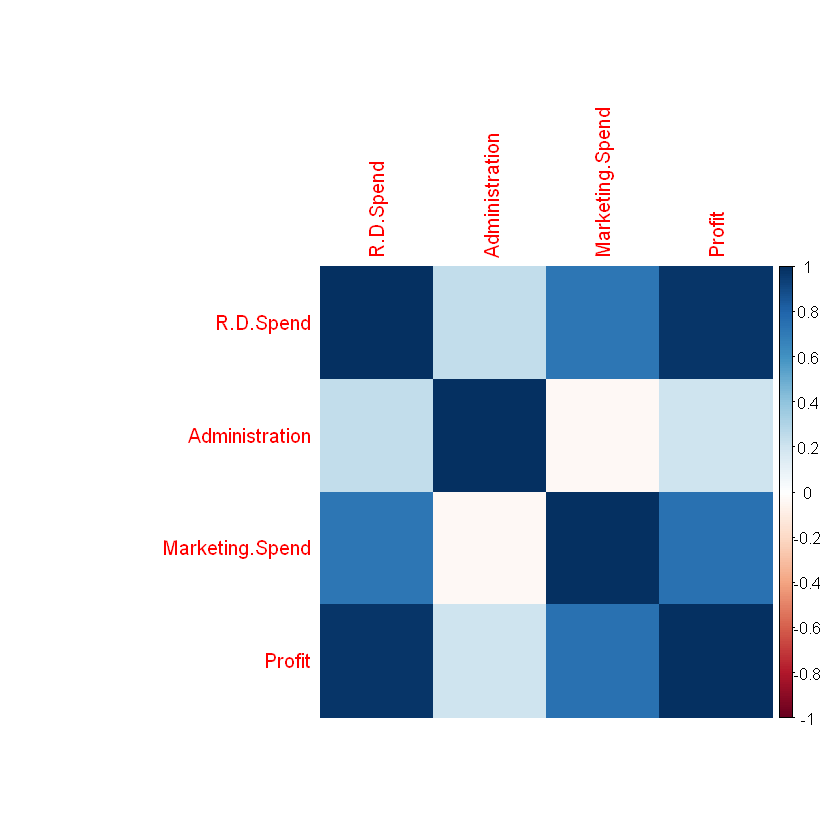

In [18]:
print(corrplot(corr.data,method = 'color'))

Blue indicate the positive and white and red indicate the negative , we can see the corelation digonal of R.D spent it means it has corelation with many other features 

                R.D.Spend Administration Marketing.Spend    Profit
R.D.Spend       1.0000000     0.24195525      0.72424813 0.9729005
Administration  0.2419552     1.00000000     -0.03215388 0.2007166
Marketing.Spend 0.7242481    -0.03215388      1.00000000 0.7477657
Profit          0.9729005     0.20071657      0.74776572 1.0000000


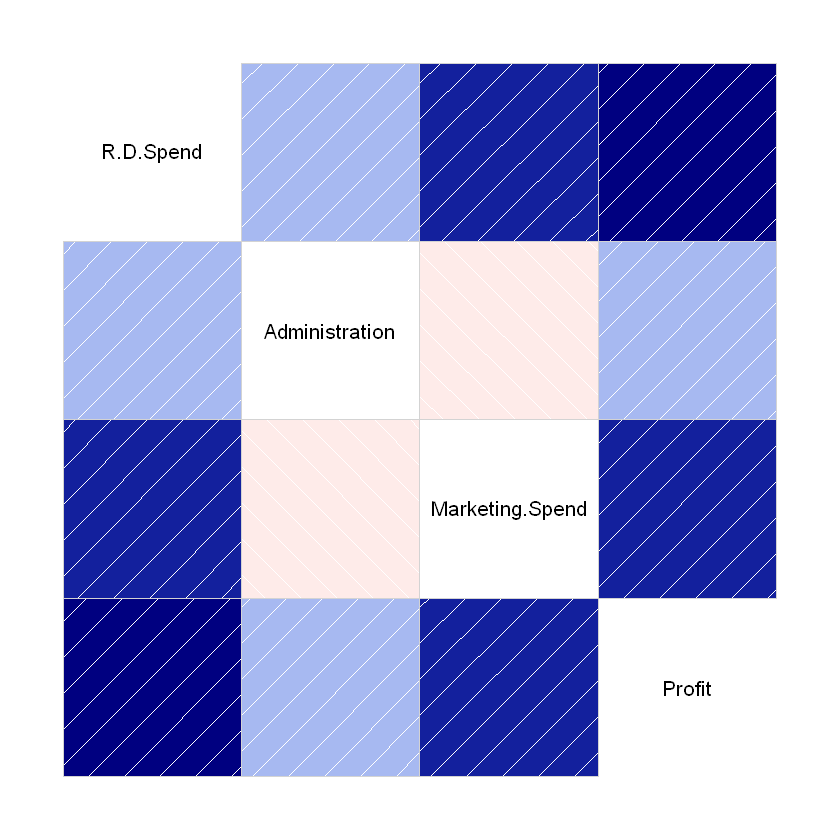

In [19]:
print(corrgram(corr.data))

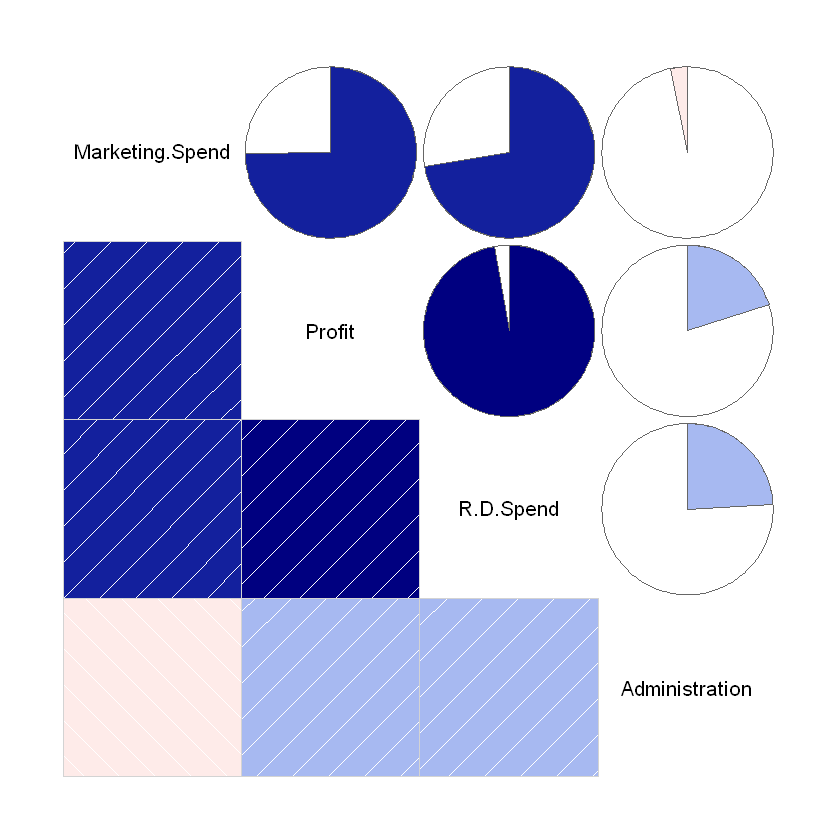

In [20]:
corrgram(df,order=TRUE,lower.panel = panel.shade,upper.panel = panel.pie,text.panel = panel.txt)

We have to find out realtoinship Profit with orher variable , Profit with marketing we find 74% positive correaltion exitst,Profit with research spending 97% exists , Profit with Administration 20% exists  

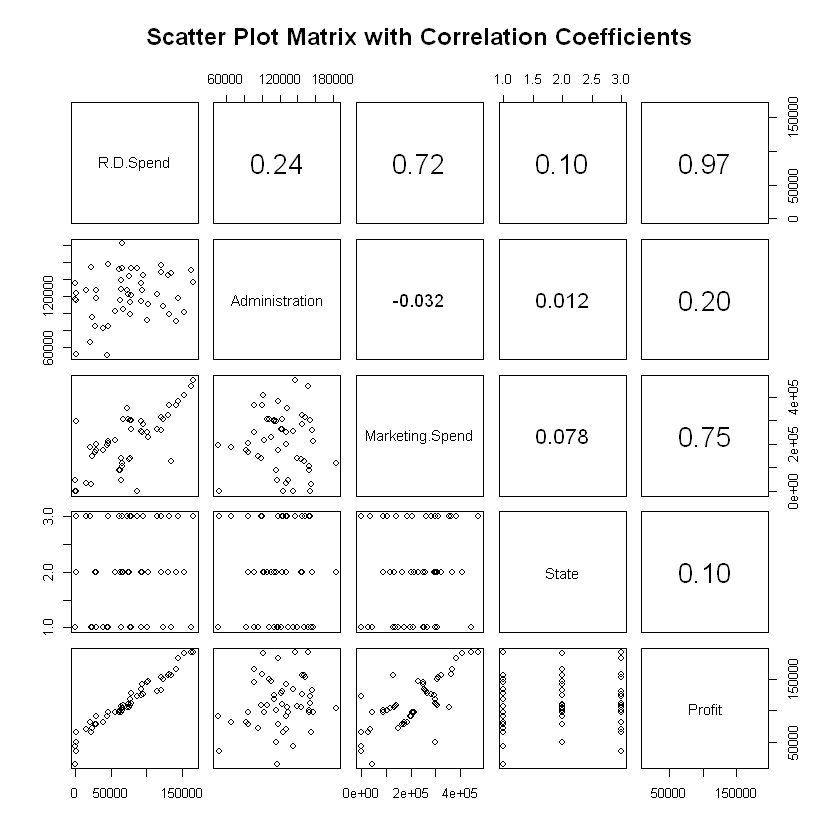

In [21]:
panel.cor <- function(x, y, digits=2, prefix="", cex.cor)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))
  r = (cor(x, y))
  txt <- format(c(r, 0.123456789), digits=digits)[1]
  txt <- paste(prefix, txt, sep="")
  if(missing(cex.cor)) cex <- 0.4/strwidth(txt)
  text(0.5, 0.5, txt, cex = cex)
}
pairs(df, upper.panel=panel.cor,main="Scatter Plot Matrix with Correlation Coefficients")
#we 

What is the underline interpretation of the above annalysis is if we spend in Research and Developemnet , as compard to Marketing spendding and Adminitration we will get more profit 

Quesion no 1 : Prepare a prediction model of the data , Question no 2 Do make transform the data for better results , Question no 3- Make a table containing R^2 value for each model 

Question nuber 1 : preparation of model for better prediction of our data we need to see which type of data is and which model is suitable for our data it is a numerical data 

### First check normality of our data

In [22]:
attach(df)

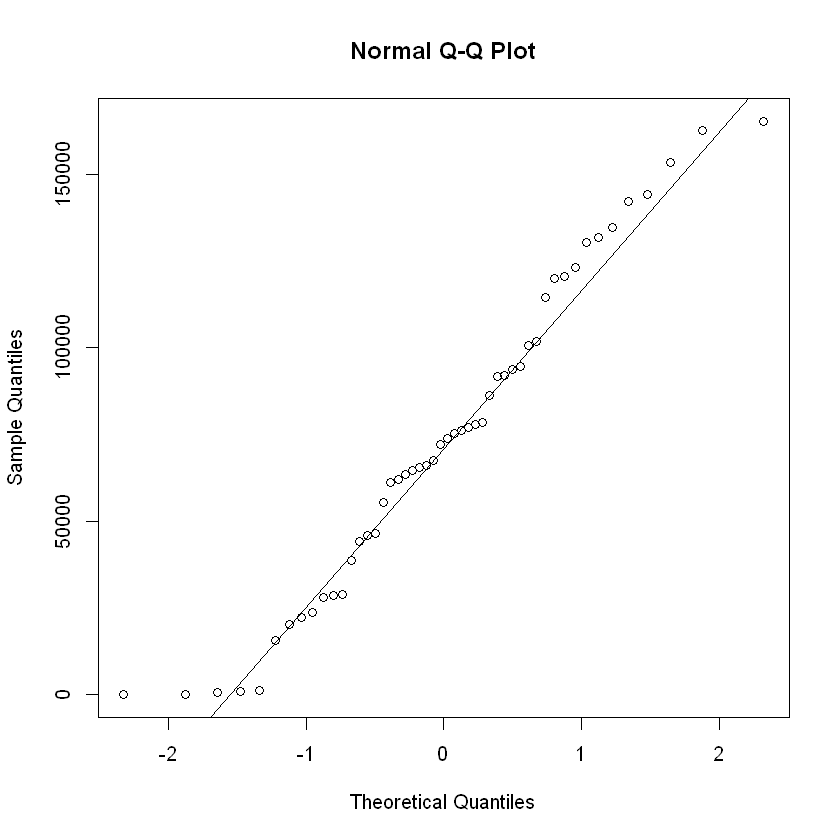

In [23]:
qqnorm(df$R.D.Spend)
qqline(df$R.D.Spend)

it looks like Research spend normal but absolutely not normal


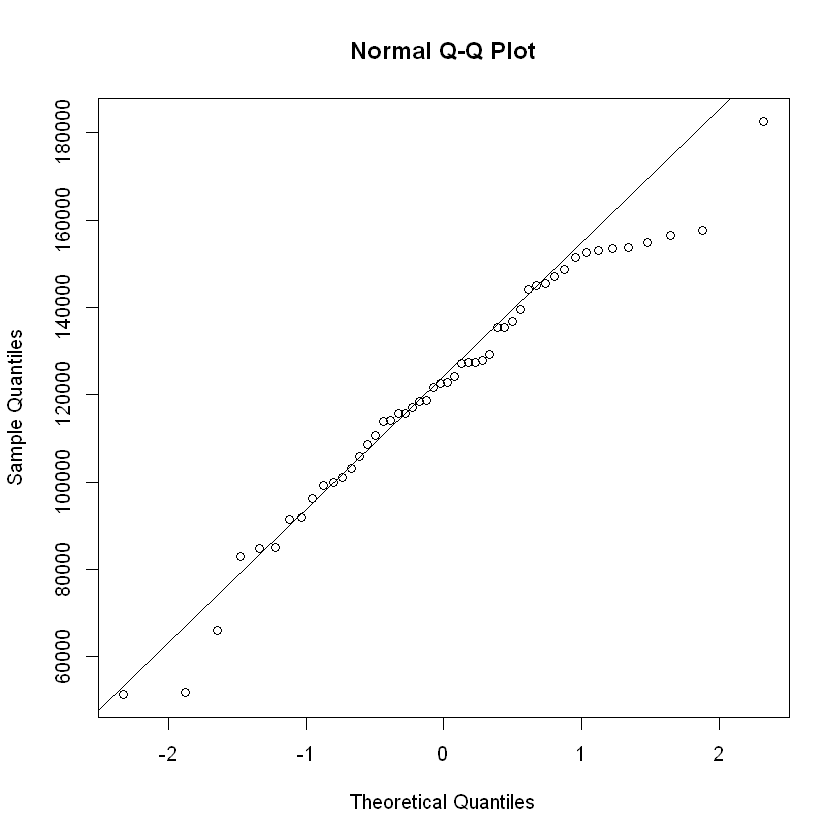

In [24]:
qqnorm(df$Administration)
qqline(df$Administration)

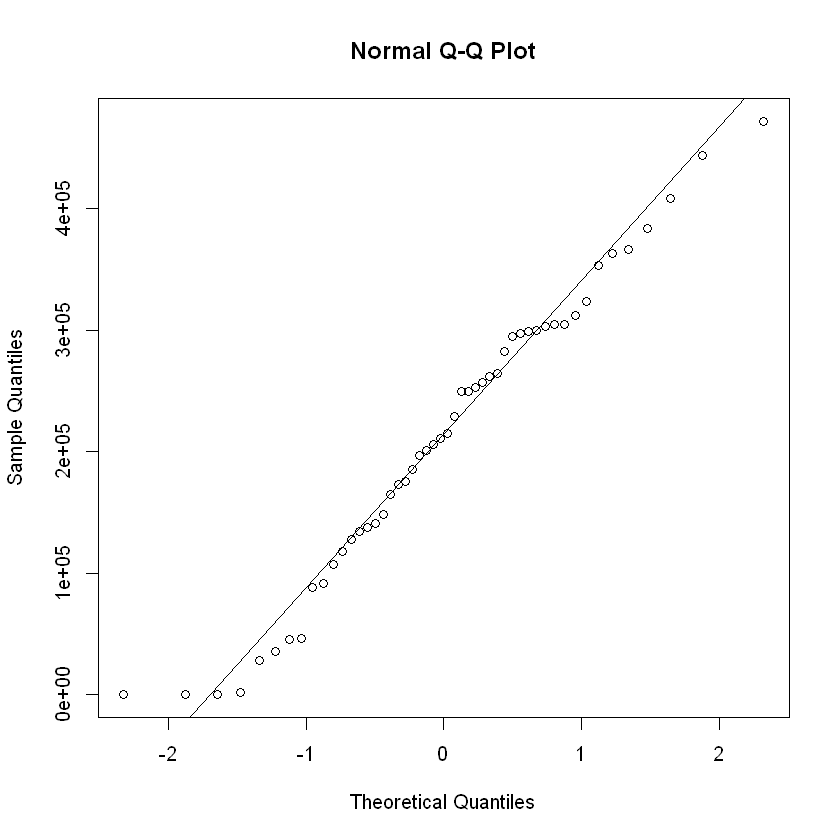

In [25]:
qqnorm(df$Marketing.Spend)
qqline(df$Marketing.Spend)

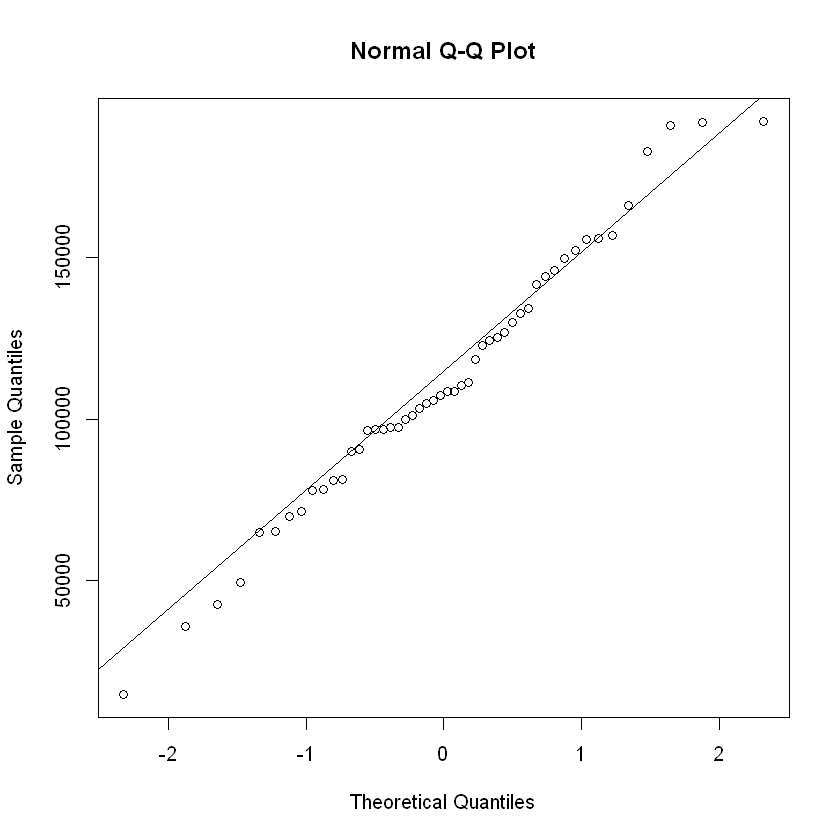

In [26]:
qqnorm(df$Profit)
qqline(df$Profit)

### XY plotting to gaining more out of the data Visualization prospective 

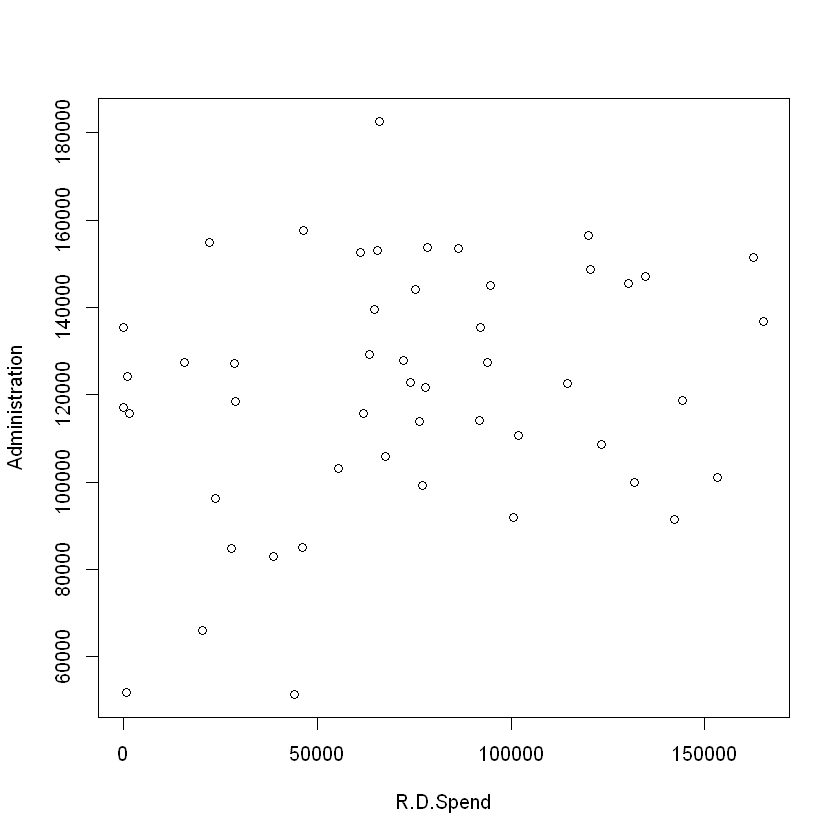

In [27]:
plot(R.D.Spend,Administration) # it shows appros no relation between reserch spend with administaraion

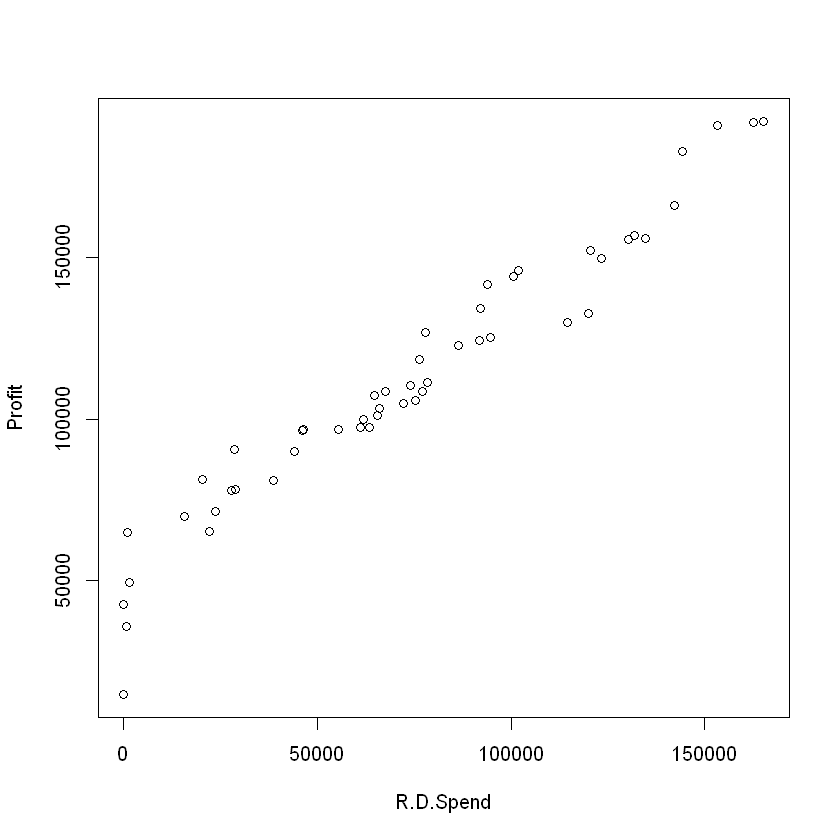

In [28]:
plot(R.D.Spend,Profit) # we can see the linear relationship between research spend and profit

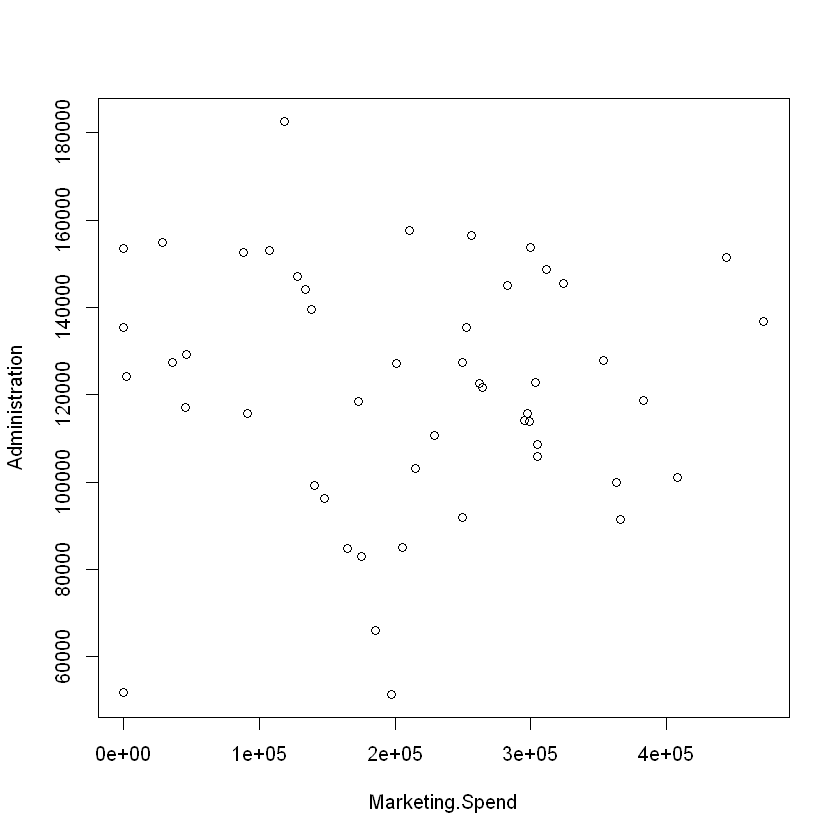

In [29]:
plot(Marketing.Spend,Administration) # simply we also clearly find no clear pattern in marketing spend and Administration

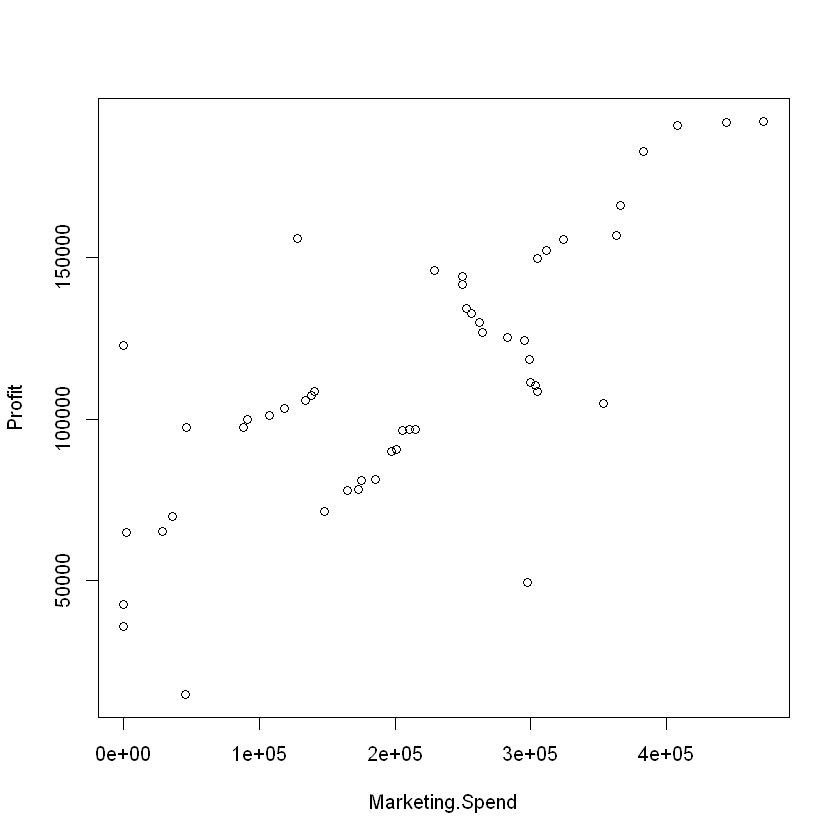

In [30]:
plot(Marketing.Spend,Profit) # ther is some relation exist between marketing spend and profit

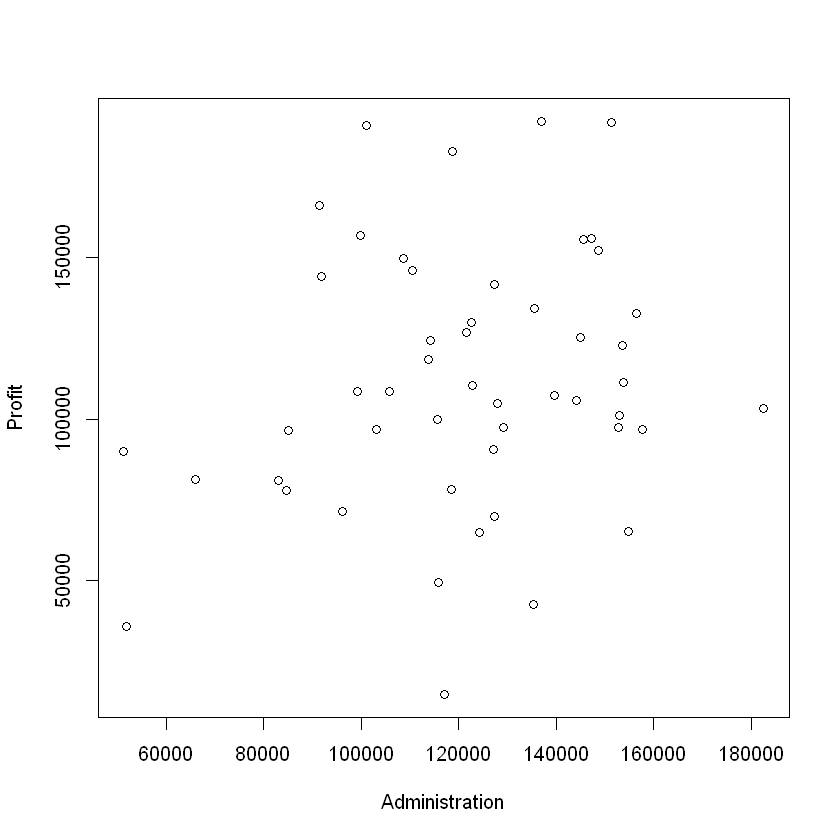

In [31]:
plot(Administration,Profit) # not so clearly visible profit realtionship with Administration 

# Lets Split our data into Train and test 

In [32]:
typeof(df) # the type of data frame

[1] "list"

We want states in our data so lets create dummy variable 

In [33]:
head(df[4]) # head of our dataframe includes repetetive states 

,State
,<fct>
1,New York
2,California
3,Florida
4,New York
5,Florida
6,New York


In [34]:
state_factor  <- as.factor(df$State) # state factorial data

In [35]:
print(head(state_factor)) # we can find the levels below

[1] New York   California Florida    New York   Florida    New York  
Levels: California Florida New York


In [36]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"


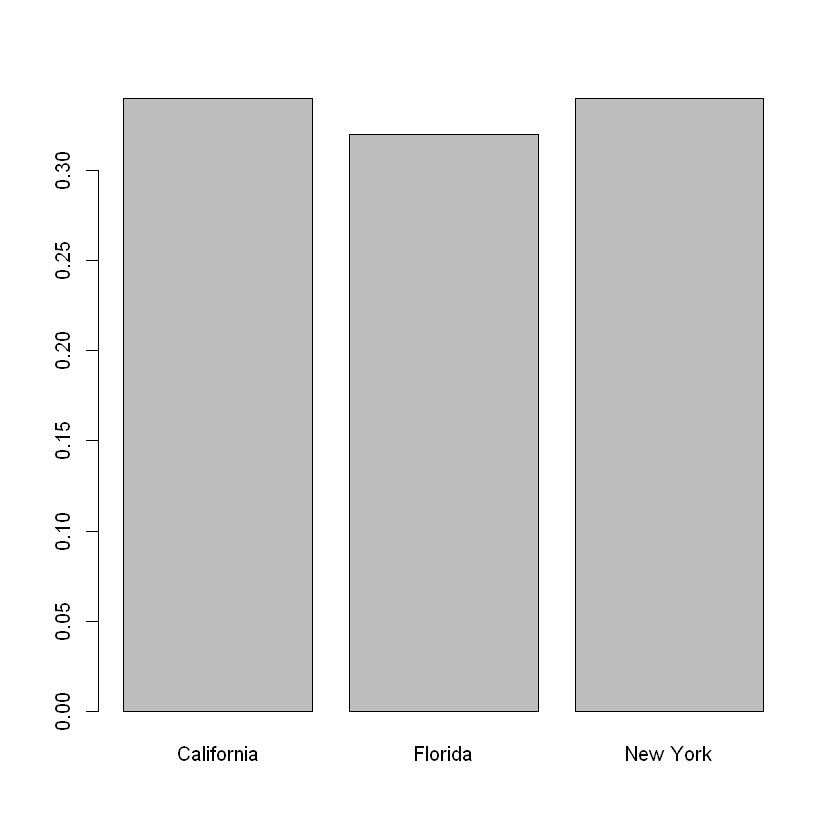

In [37]:
barplot(prop.table(table(state_factor))) # details of state catagorical data visualization 

# Train Test Splited data set

In [41]:
attach(df)

The following objects are masked from df (pos = 4):

    Administration, Marketing.Spend, Profit, R.D.Spend, State




In [42]:
library(caTools)

Warning message:
"package 'caTools' was built under R version 3.6.3"


In [43]:
set.seed(012)
split = sample.split(df$Profit,SplitRatio = 0.8)

In [44]:

x_train = subset(df,split == TRUE)

In [45]:
x_test = subset(df,split == FALSE)

In [46]:
head(x_test)

,R.D.Spend,Administration,Marketing.Spend,State,Profit
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
2,162597.70,151377.59,443898.53,California,191792.06
3,153441.51,101145.55,407934.54,Florida,191050.39
12,100671.96,91790.61,249744.55,California,144259.40
32,61136.38,152701.92,88218.23,New York,97483.56
33,63408.86,129219.61,46085.25,California,97427.84
34,55493.95,103057.49,214634.81,Florida,96778.92


In [55]:
lm = lm(Profit~R.D.Spend+Administration+Marketing.Spend+State,data=x_train) # including state

In [58]:
print(summary(lm)) # likely our adjusted R^2 is showing good results 


Call:
lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + 
    State, data = x_train)

Residuals:
   Min     1Q Median     3Q    Max 
-33339  -4335   -405   6677  16119 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.614e+04  9.213e+03   5.008 1.68e-05 ***
R.D.Spend       7.895e-01  5.432e-02  14.535 3.75e-16 ***
Administration  6.146e-03  6.848e-02   0.090    0.929    
Marketing.Spend 2.580e-02  1.995e-02   1.294    0.205    
StateFlorida    1.079e+03  4.256e+03   0.253    0.801    
StateNew York   1.069e+03  4.185e+03   0.255    0.800    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10370 on 34 degrees of freedom
Multiple R-squared:  0.9398,	Adjusted R-squared:  0.9309 
F-statistic: 106.2 on 5 and 34 DF,  p-value: < 2.2e-16



In [59]:
profit.predict  <- predict(lm,x_test)

In [60]:
result  <- cbind(profit.predict,x_test$Profit)
colnames(result) <- c('Predicted','Actual')
result  <-  as.data.frame(result)
print(result)

   Predicted    Actual
2  186895.81 191792.06
3  179508.92 191050.39
12 132627.78 144259.40
32  98688.54  97483.56
33  98182.57  97427.84
34  97200.77  96778.92
36  89359.93  96479.51
38  86329.83  89949.14
43  69211.52  71498.49
45  65328.78  65200.33


In [66]:
library(car)

Warning message:
"package 'car' was built under R version 3.6.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 3.6.3"

Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode




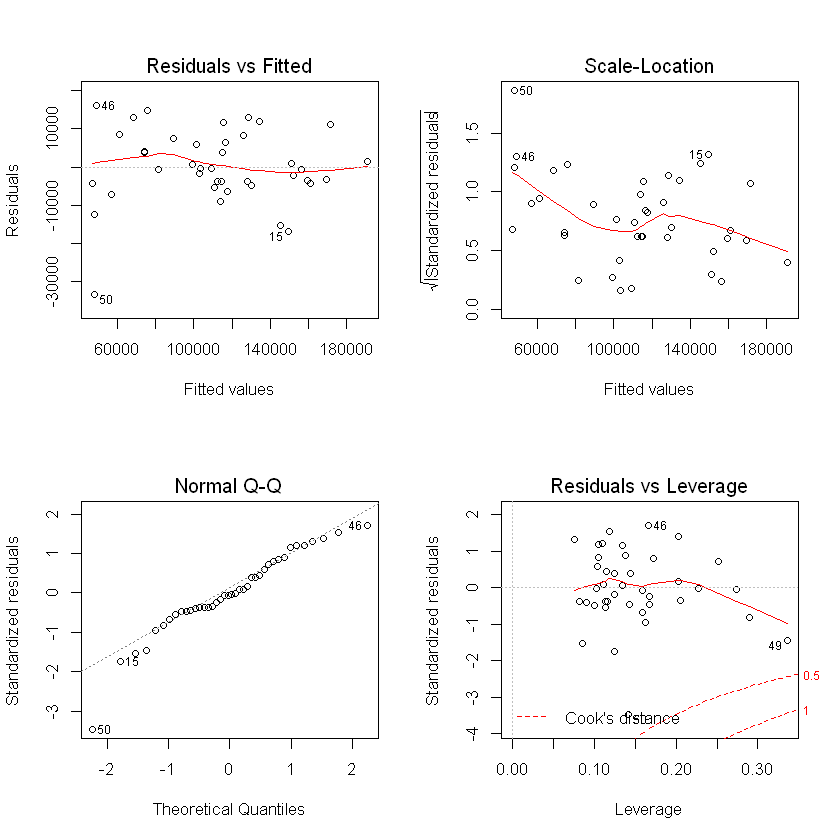

In [62]:
par(mfcol = c(2,2))
plot(lm)

46 50 
36 40

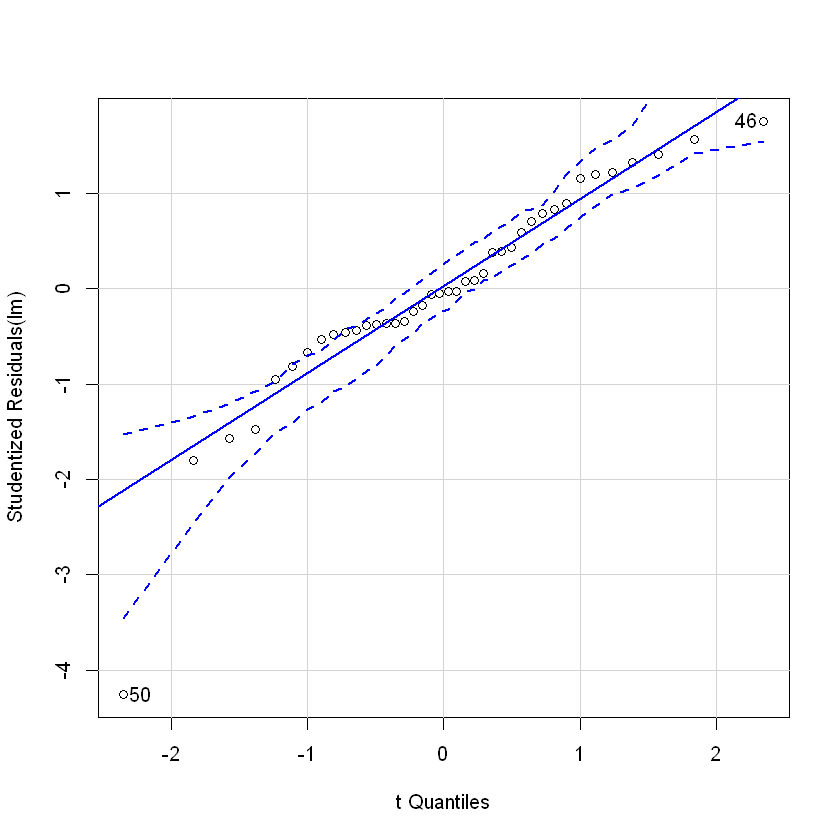

In [67]:
qqPlot(lm,identify.n=6) # at this point 50 is the outlier 

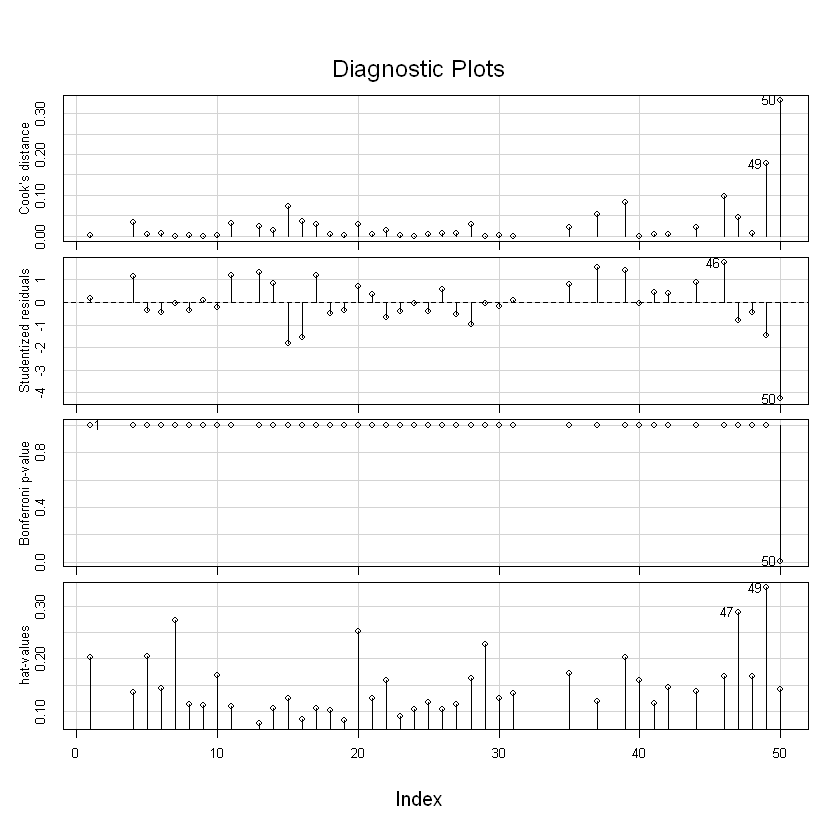

In [70]:
influenceIndexPlot(lm)

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
15,-1.7974596,0.1247483,0.07202261
47,-0.8129249,0.2894302,0.04531485
49,-1.4778493,0.3357658,0.17781053
50,-4.2560535,0.1420517,0.33249660


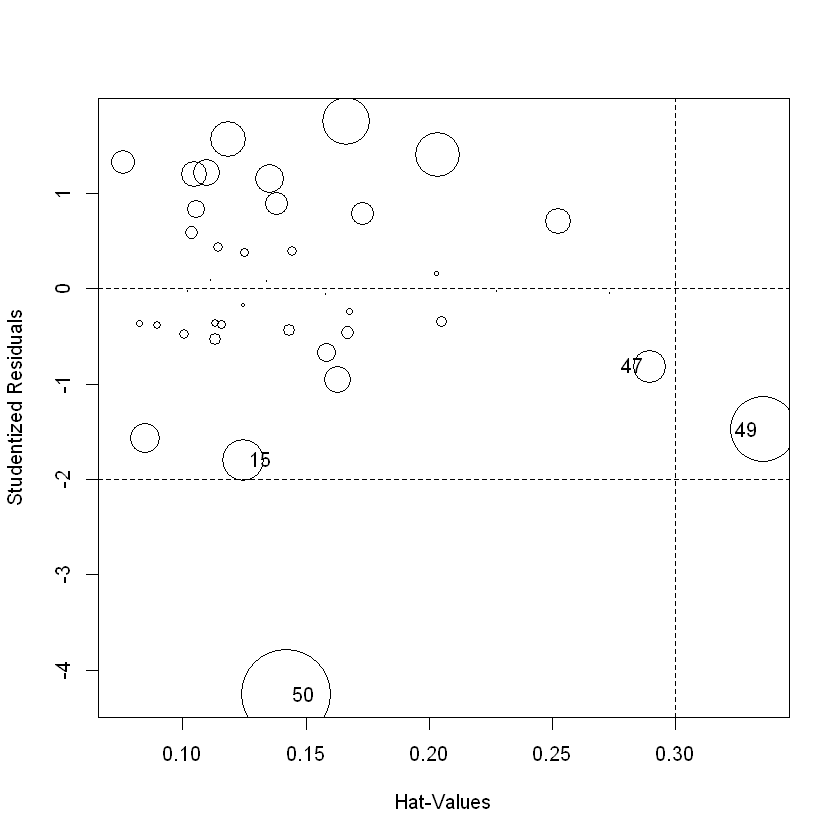

In [71]:
influencePlot(lm)

likely as we can see 50 is the largest influencive value that has to be removed from our model

In [76]:
lm1 = lm(Profit~R.D.Spend+Administration+Marketing.Spend+State,data=df[-50,]) # including state

In [77]:
print(summary(lm1)) # after removing the index 50th item our model become 95% better 


Call:
lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + 
    State, data = df[-50, ])

Residuals:
   Min     1Q Median     3Q    Max 
-16374  -4572  -1225   5304  15402 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.338e+04  5.794e+03   9.212 9.79e-12 ***
R.D.Spend        7.836e-01  3.907e-02  20.056  < 2e-16 ***
Administration  -2.202e-02  4.363e-02  -0.505   0.6163    
Marketing.Spend  2.582e-02  1.432e-02   1.804   0.0783 .  
StateFlorida    -1.564e+03  2.842e+03  -0.550   0.5849    
StateNew York   -1.954e+03  2.752e+03  -0.710   0.4815    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7881 on 43 degrees of freedom
Multiple R-squared:  0.9618,	Adjusted R-squared:  0.9574 
F-statistic: 216.6 on 5 and 43 DF,  p-value: < 2.2e-16



,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
15,-2.304678,0.1058707,0.09526777
46,2.186189,0.1307280,0.11011606
47,-1.265545,0.2677173,0.09624265
49,-2.325499,0.2579038,0.28411621


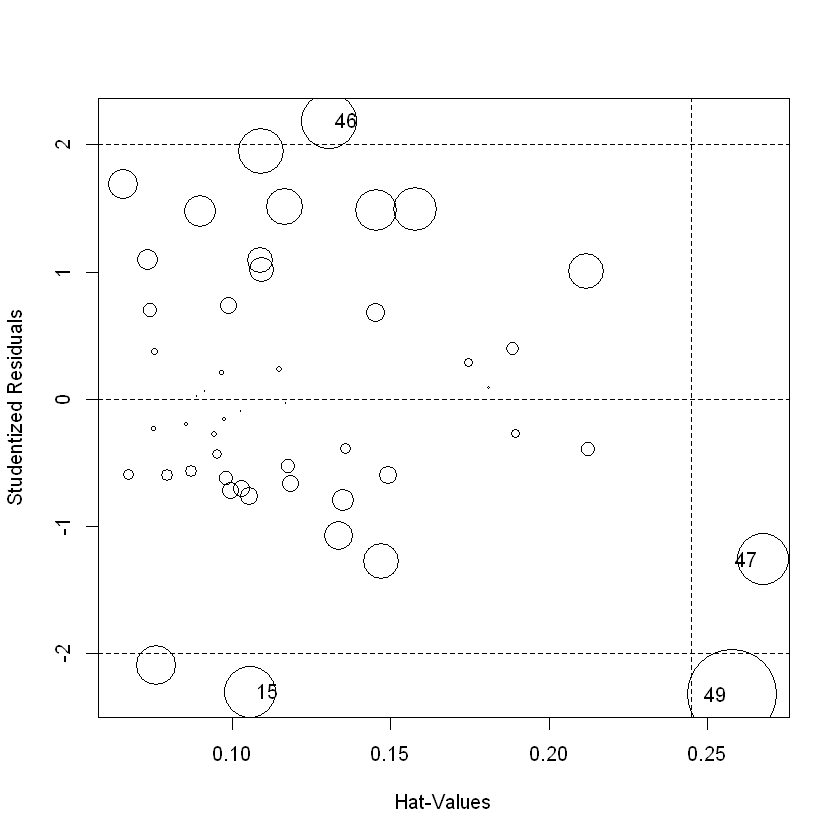

In [78]:
influencePlot(lm1)

### We can further proceed with train test and lots of model building and remodelling our data as we want until finding a better model